# Trabalho 0

Rafael Sartori M. Santos, 186154

## Problema

O objetivo é realizar processamento básico em imagens, preferindo a solução que utiliza vetorização.

## Organização:

* Primeiro trecho: base para processamento geral (abrir, salvar, mostrar imagens)
* Trechos do trabalho: utilizar processamento geral para alterar e produzir imagens

In [37]:
from matplotlib import pyplot as plt # para gráficos e imagens
import numpy as np # numpy para transformações
import glob # para abrir todos os PNGs da pasta ../Imagem/
import cv2 # OpenCV para lidar com imagens
import os # para criar pasta de saída de imagens


CAMINHO_IMAGEM = '../Imagens/'

## Carregamos todas as imagens num dicionário
## Chave = caminho da imagem
## Valor = imagem
imagens = {}
# Para todas as imagens...
for caminho in glob.glob('{0}*.png'.format(CAMINHO_IMAGEM)):
    # Carregamos imagem utilizando OpenCV
    imagem = cv2.imread(caminho, cv2.IMREAD_UNCHANGED)
    # Guardamos no dicionário com o caminho original
    imagens[caminho] = imagem
    

## Função para salvar a imagem
## Caminho da imagem original
def salvar_imagem(caminho, pasta, imagem):
    # Garantimos que o diretório existe
    try:
        os.makedirs(pasta)
    except FileExistsError:
        pass
    # Utilizamos OpenCV para salvar imagem no novo caminho
    cv2.imwrite(caminho.replace(CAMINHO_IMAGEM, pasta), imagem)

    
## Função para mostrar imagem utilizando matplotlib
def mostrar_imagem(imagem):
    # Criamos um plot e adicionamos a imagem
    plt.imshow(imagem, cmap='gray', interpolation='bicubic')
    plt.show()

## Transformação de intensidade

Transformaremos as intensidades de forma a obtermos o negativo

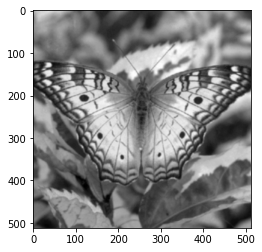

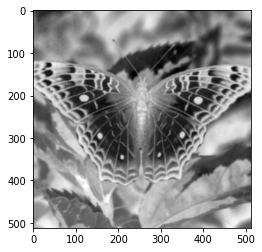

In [48]:
CAMINHO_SALVAR = '1.intensidade/'
primeira = True

# Para cada imagem...
for caminho, imagem in imagens.items():
    # Carregamos a imagem em um vetor numpy
    img = np.array(imagem)
    
    # Aplicamos a inversão simétrica (255 -> 0, 254 -> 1 etc)
    # f(x) = 255 - x
    img = (np.ones(img.shape) * 255) - img
    
    # Salvamos as imagens
    salvar_imagem(caminho, CAMINHO_SALVAR, img)
    
    # Se é a primeira imagem, mostramos o antes e depois
    if primeira:
        primeira = False
        mostrar_imagem(imagem)
        mostrar_imagem(img)